# analysis of /tmp 
breakdown jobs and procs by file system usage (tmp,ptmp,xtmp,vftmp)

In [1]:
#get data to test on
import epmt_query as eq
import sys
sys.path.insert(0,'/home/Ian.Laflotte/ians_py374/pip_experiment')
import matplotlib.pyplot as plt
import numpy as np
import time
job_num =1000
jobs_all = eq.get_jobs(limit = job_num, before = -7)


In [2]:
tmp_jobs =[]
ptmp_jobs =[]
xtmp_jobs =[]
vftmp_jobs =[]
job_id = []   #will come into play much later
for job in jobs_all:
    job_id.append(job['jobid'])
    if job['env_dict']['TMPDIR'].find('/tmp')>=0:
        tmp_jobs.append(job)
    if job['env_dict']['TMPDIR'].find('ptmp')>=0:
        ptmp_jobs.append(job)
    if job['env_dict']['TMPDIR'].find('xtmp')>=0:
        xtmp_jobs.append(job)
    if job['env_dict']['TMPDIR'].find('vftmp')>=0:
        vftmp_jobs.append(job)


<BarContainer object of 4 artists>

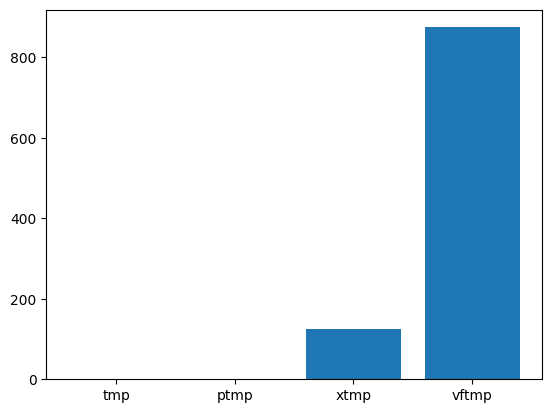

In [31]:
plt.style.use('default')
plt.bar(['tmp','ptmp','xtmp','vftmp'],[len(tmp_jobs),len(ptmp_jobs),len(xtmp_jobs),len(vftmp_jobs)])

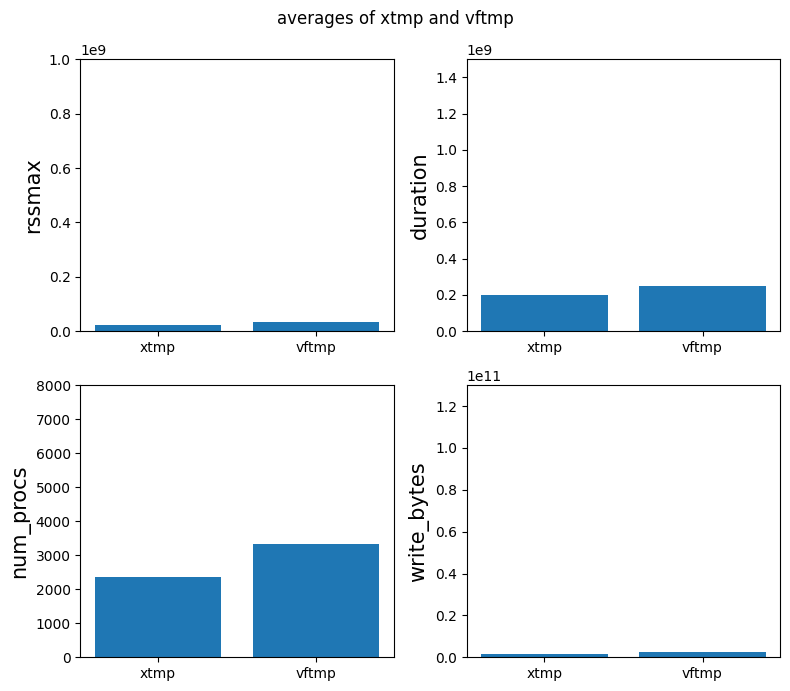

In [4]:
# make series of comparision plots, start with data wrangling
xtmp_rssmax = []
xtmp_duration = []
xtmp_procs = []
xtmp_write_bytes = []
vftmp_rssmax = []
vftmp_duration = []
vftmp_procs = []
vftmp_write_bytes = []
for job in xtmp_jobs:
    if 'rssmax' in job:
        xtmp_rssmax.append(job['rssmax'])
        xtmp_duration.append(job['duration'])
        xtmp_procs.append(job['num_procs'])
        xtmp_write_bytes.append(job['write_bytes'])
for job in vftmp_jobs:
    if 'rssmax' in job:
        vftmp_rssmax.append(job['rssmax'])
        vftmp_duration.append(job['duration'])
        vftmp_procs.append(job['num_procs'])
        vftmp_write_bytes.append(job['write_bytes'])
all_data = [xtmp_rssmax, xtmp_duration, xtmp_procs, xtmp_write_bytes,vftmp_rssmax, vftmp_duration, vftmp_procs, vftmp_write_bytes]

#plotting section-setup
plt.style.use('default')
factor_list = ['rssmax', 'duration', 'num_procs', 'write_bytes']
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(8,7))
ax =ax.ravel() 
#plot
for aa in range(4):
    ax[aa].bar(['xtmp','vftmp'],[sum(all_data[aa])/len(all_data[aa]),sum(all_data[aa+4])/len(all_data[aa+4])])
    ax[aa].set_ylabel(factor_list[aa],fontsize = 15)
#    ax[aa].set_yscale('log')
ax[0].set_ylim(0,1e9)
ax[1].set_ylim(0,1.5e9)
ax[2].set_ylim(0,8000)
ax[3].set_ylim(0,1.3e11)
plt.suptitle('averages of xtmp and vftmp')
plt.tight_layout()

In [5]:
#same plot, but broken down by ocean jobs
#separate jobs with 'ocean' related tags
ocean_jobs = []
#breaks down data into dictonaries
for job_instance in range(job_num):
    if jobs_all[job_instance].get('rssmax') is None or (
        len(jobs_all[job_instance].get('tags')) == 0):
        continue
    if 'exp_component' in jobs_all[job_instance]['tags']: 
        tags = (jobs_all[job_instance].get('tags')['exp_component']) #every tag, regardless of 'ocean'
        if tags.find('ocean') >= 0:   #find returns an integer if the exact word is in the string
            ocean_jobs.append(jobs_all[job_instance])
#print checks on data        
print('ocean jobs found = ',(len(ocean_jobs)),' out of ',job_num,' jobs.')

ocean jobs found =  1000  out of  1000  jobs.


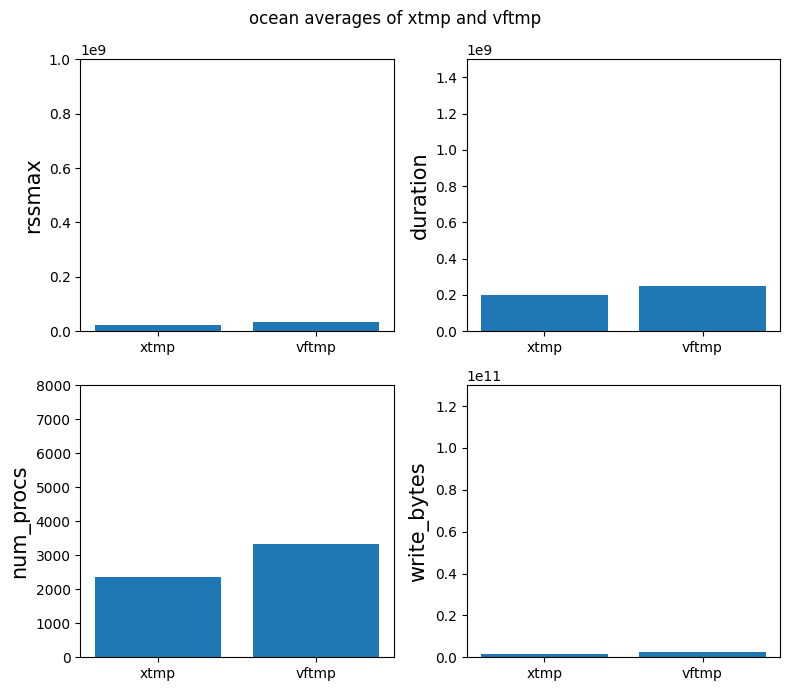

In [6]:
#sort data by xtmp and vftmp
xtmp_jobs =[]
vftmp_jobs =[]
xtmp_rssmax = []
xtmp_duration = []
xtmp_procs = []
xtmp_write_bytes = []
vftmp_rssmax = []
vftmp_duration = []
vftmp_procs = []
vftmp_write_bytes = []

for job in ocean_jobs:
    if job['env_dict']['TMPDIR'].find('xtmp')>=0:
        xtmp_jobs.append(job)
        xtmp_rssmax.append(job['rssmax'])
        xtmp_duration.append(job['duration'])
        xtmp_procs.append(job['num_procs'])
        xtmp_write_bytes.append(job['write_bytes'])
    if job['env_dict']['TMPDIR'].find('vftmp')>=0:
        vftmp_jobs.append(job)
        vftmp_rssmax.append(job['rssmax'])
        vftmp_duration.append(job['duration'])
        vftmp_procs.append(job['num_procs'])
        vftmp_write_bytes.append(job['write_bytes'])
all_data = [xtmp_rssmax, xtmp_duration, xtmp_procs, xtmp_write_bytes,vftmp_rssmax, vftmp_duration, vftmp_procs, vftmp_write_bytes]

#plotting section-setup
plt.style.use('default')
factor_list = ['rssmax', 'duration', 'num_procs', 'write_bytes']
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(8,7))
ax =ax.ravel() 
#plot
for aa in range(4):
    ax[aa].bar(['xtmp','vftmp'],[sum(all_data[aa])/len(all_data[aa]),sum(all_data[aa+4])/len(all_data[aa+4])])
    ax[aa].set_ylabel(factor_list[aa],fontsize = 15)
#    ax[aa].set_yscale('log')
ax[0].set_ylim(0,1e9)
ax[1].set_ylim(0,1.5e9)
ax[2].set_ylim(0,8000)
ax[3].set_ylim(0,1.3e11)
plt.suptitle('ocean averages of xtmp and vftmp')
plt.tight_layout()

# proc breakdown
We wish to see how file systems are moved between within a jobs procs. We will remake above graph based on procs, then break down into each process.


In [7]:
#turn jobs above into procs
start = time.time()
all_procs = eq.get_procs(job_id, fmt = 'dct')
print('run time:',(time.time()-start)/60,' minutes')

run time: 13.499221642812094  minutes


Text(0, 0.5, 'counts')

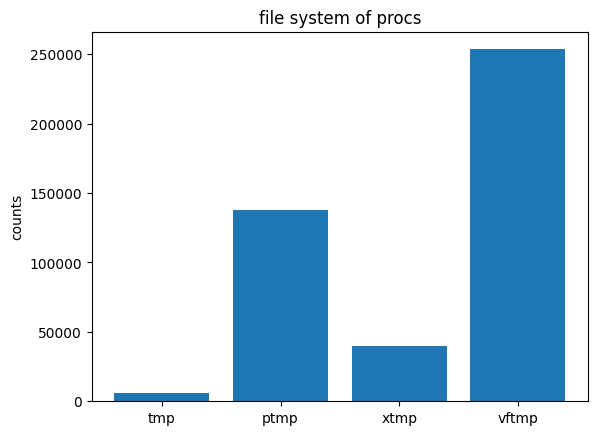

In [8]:
#bar graph of file system usage
tmp_procs =[]
ptmp_procs =[]
xtmp_procs =[]
vftmp_procs =[]
for proc in all_procs:
    if proc['args'].find('/tmp')>=0:
        tmp_procs.append(proc)
    if proc['args'].find('ptmp')>=0:
        ptmp_procs.append(proc)
    if proc['args'].find('xtmp')>=0:
        xtmp_procs.append(proc)
    if proc['args'].find('vftmp')>=0:
        vftmp_procs.append(proc)
#make plot
plt.style.use('default')
plt.bar(['tmp','ptmp','xtmp','vftmp'],[len(tmp_procs),len(ptmp_procs),len(xtmp_procs),len(vftmp_procs)])
plt.title('file system of procs')
plt.ylabel('counts')

# heatmaps of operations
each chosen op gets a heatmap of its changing filesystems

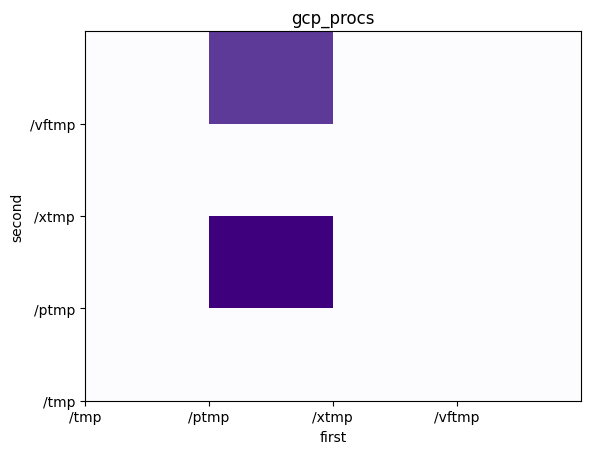

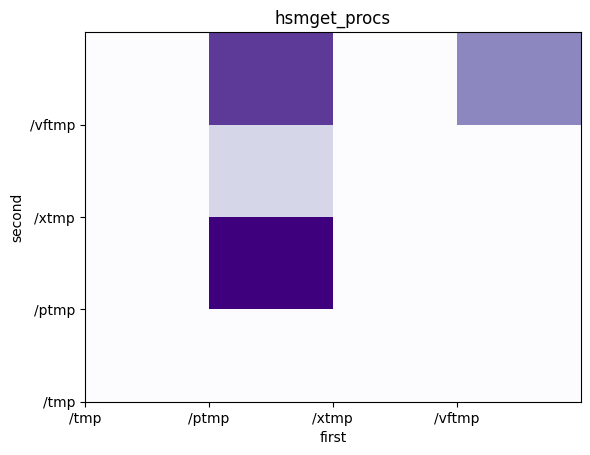

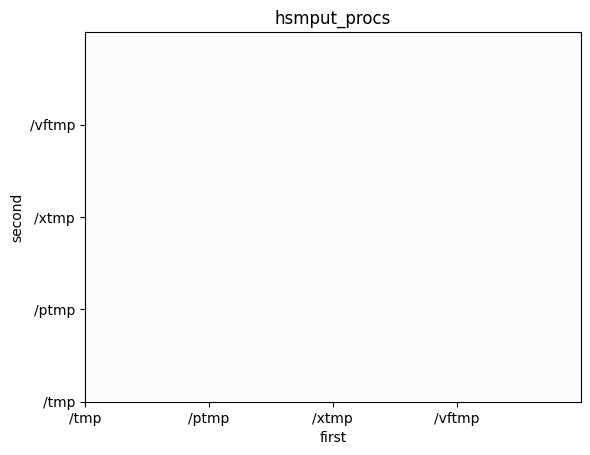

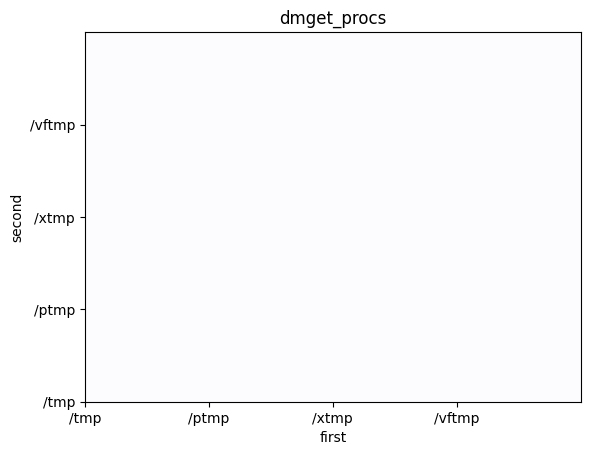

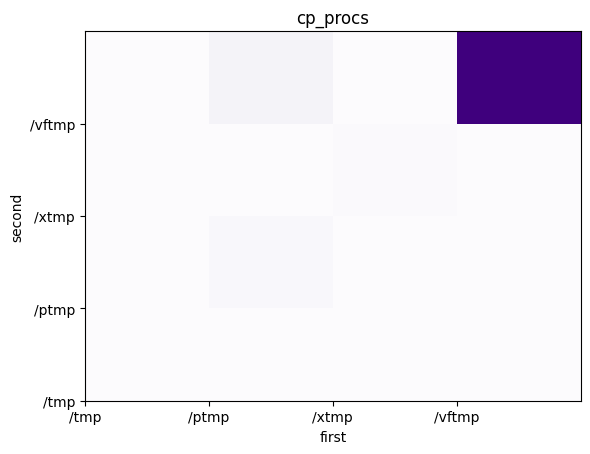

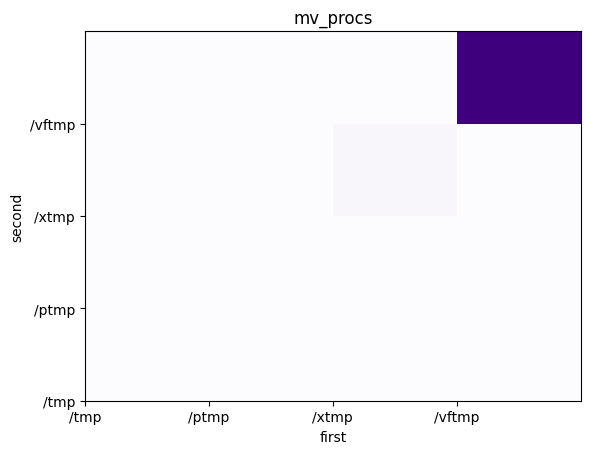

time:  28484382.594085876


In [23]:
# separate procs by their op (gcp, hsmget, hsmput, dmget, dmput, cp, mv)
start = time.time()
gcp_procs =[]
hsmget_procs =[]
hsmput_procs =[]
dmget_procs =[]
cp_procs = []
mv_procs = []
for proc in all_procs:
    if proc['exename'].find('gcp')>=0 or proc['args'].find('gcp')>=0:
        gcp_procs.append(proc)
        continue
    if proc['exename'].find('hsmget')>=0 or proc['args'].find('hsmget')>=0:
        hsmget_procs.append(proc)
        continue
    if proc['exename'].find('hsmput')>=0 or proc['args'].find('hsmput')>=0:
        hsmput_procs.append(proc)
        continue
    if proc['exename'].find('dmget')>=0 or proc['args'].find('dmget')>=0:
        dmget_procs.append(proc)
        continue
    if proc['exename'].find('cp')>=0 or proc['args'].find('cp')>=0:
        cp_procs.append(proc)
        continue
    if proc['exename'].find('mv')>=0 or proc['args'].find('mv')>=0:
        mv_procs.append(proc)
        continue
#search for file system shifts
proc_list = [gcp_procs, hsmget_procs, hsmput_procs, dmget_procs, cp_procs, mv_procs]
proc_name = ['gcp_procs', 'hsmget_procs', 'hsmput_procs', 'dmget_procs', 'cp_procs', 'mv_procs']
file_names = ['/tmp','/ptmp','/xtmp','/vftmp']
for aa in range(6):
    first = []
    second = []
    test = 0
    for proc in proc_list[aa]:
        if len([i for i in range(len(proc['args'])) if proc['args'].startswith('tmp', i)]) < 2:
            continue
        a = 0
        b = 0
        stand_in = 0 #to get around hist2d restrictions, we represent file names with numbers
        #special case in which string contains two file system names, and the 2nd is correct
        start = 0
        if proc_name[aa] == 'hsmget_procs'or proc_name[aa] == 'hsmput_procs':
            if len([i for i in range(len(proc['args'])) if proc['args'].startswith('tmp', i)]) > 2: 
                start = proc['args'].find('tmp')+1
        for file in file_names:
            if 0 <= proc['args'].find(file,start) and a ==0:
                first.append(stand_in)
                a += 1
            if proc['args'].find(file,proc['args'].find('tmp',start)+3)>0 and b == 0:
                second.append(stand_in)
                #print(file,stand_in)
                b += 1
            stand_in += 1
    plt.figure()
    plt.hist2d(first,second, bins =([0,1,2,3,4],[0,1,2,3,4]), cmap = 'Purples')
    # Set number of ticks for x-axis
    plt.xticks([0,1,2,3], labels = file_names)
    plt.yticks([0,1,2,3],labels = file_names)
    #bells and whistles
    plt.ylabel('second')
    plt.xlabel('first')
    plt.title(proc_name[aa])

    plt.show()

print('time: ',(time.time()-start)/60)


Text(0.5, 0.98, 'histograms of duration for tmp')

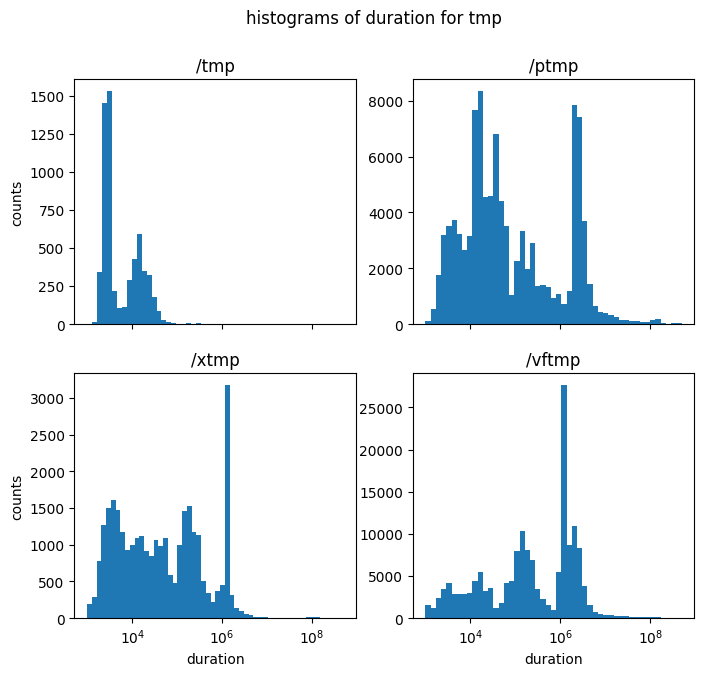

In [32]:
#histograms for tmp
plt.style.use('default')
factor = 'duration'   #['duration', 'rssmax', 'write_bytes']
proc_combined = [tmp_procs, ptmp_procs, xtmp_procs, vftmp_procs]
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(8,7),sharex = True)
ax =ax.ravel() 
for aa in range(4):
    specific_proc_group =proc_combined[aa]
    data = []
    for proc in specific_proc_group:
        data.append(proc[factor])
    ax[aa].hist(data, bins = np.logspace(3,np.log10(max(data)),50))
    ax[aa].set_xscale('log')
    ax[aa].set_title(file_names[aa])
ax[2].set_xlabel(factor)
ax[3].set_xlabel(factor)
ax[0].set_ylabel('counts')
ax[2].set_ylabel('counts')

plt.suptitle('histograms of '+factor+' for tmp')

4